### Problem Statement
You are a data scientist / AI engineer at an educational consulting firm. You have been provided with a dataset named **`"student_scores.csv"`**, which includes records of the number of hours students studied and the marks they obtained. The dataset comprises the following columns:

- `hours:` The number of hours a student studied.
- `scores:` The marks obtained by the student.

Your task is to use this dataset to build a polynomial regression model to predict the marks of students based on the number of hours they studied. You will need to split the data into training and test sets, train the model, and evaluate its performance using appropriate metrics.

**Import Necessary Libraries**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score

# Load dataset
df = pd.read_csv("student_scores.csv")

# Quick sanity check
print(df.shape)
print(df.isna().sum())
display(df.head())


(100, 2)
hours     0
scores    0
dtype: int64


,hours,scores
0,4.4,20.0
1,9.6,90.0
2,7.6,58.0
3,6.4,31.0
4,2.4,5.0


In [2]:
df.info

<bound method DataFrame.info of     hours  scores
0     4.4    20.0
1     9.6    90.0
2     7.6    58.0
3     6.4    31.0
4     2.4     5.0
..    ...     ...
95    5.4    26.0
96    5.7    32.0
97    4.8    25.0
98    1.2     3.0
99    2.0     8.0

[100 rows x 2 columns]>

In [3]:
df.describe()

,hours,scores
count,100.000000,100.000000
mean,5.233000,34.510000
std,2.681438,29.167401
min,1.000000,0.000000
25%,2.775000,10.000000
50%,5.150000,25.000000
75%,7.600000,59.000000
max,9.900000,100.000000


### Task 1: Data Preparation and Exploration

1. Import the data from the `"student_scores.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Visualize the relationship between the number of hours studied and the marks obtained.

In [5]:
# Step 1: Import the data from the "student_study_hours.csv" file and store it in a variable 'df'


# Step 2: Display the number of rows and columns in the dataset

print(f"Shape: {df.shape[0]} rows × {df.shape[1]} cols")   # why: know sample size & features
print("\nDtypes & non-null counts:")
df.info()                                                   # why: confirm types and missing pattern
print("\nMissing values per column:")
print(df.isna().sum())                                      # why: if >0, decide imputation/rows drop
print("\nSummary stats:")
display(df.describe()) 
# Step 3: Display the first few rows of the dataset to get an overview
display(df.head())          

Shape: 100 rows × 2 cols

Dtypes & non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hours   100 non-null    float64
 1   scores  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB

Missing values per column:
hours     0
scores    0
dtype: int64

Summary stats:


,hours,scores
count,100.000000,100.000000
mean,5.233000,34.510000
std,2.681438,29.167401
min,1.000000,0.000000
25%,2.775000,10.000000
50%,5.150000,25.000000
75%,7.600000,59.000000
max,9.900000,100.000000


,hours,scores
0,4.4,20.0
1,9.6,90.0
2,7.6,58.0
3,6.4,31.0
4,2.4,5.0


In [7]:
# (Optional) adding a simple linear fit line to eyeball linearity
import numpy as np
x = df['hours'].values
y = df['scores'].values
m, b = np.polyfit(x, y, 1)                                 # why: quick least-squares line
xs = np.linspace(x.min(), x.max(), 100)
ys = m*xs + b


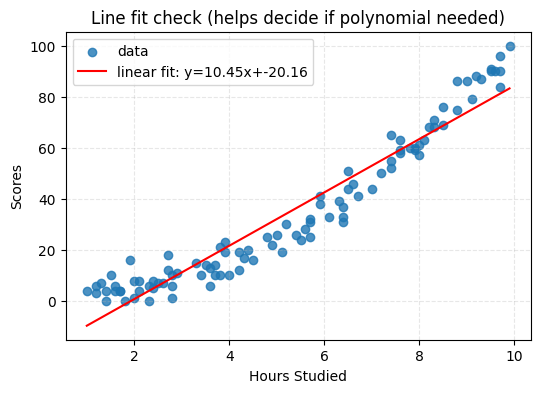

In [8]:
# Step 4: Visualize the relationship between the number of hours studied and the marks obtained
plt.figure(figsize=(6,4))
plt.scatter(x, y, alpha=0.8, label="data")
plt.plot(xs, ys, 'r', label=f"linear fit: y={m:.2f}x+{b:.2f}")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.title("Line fit check (helps decide if polynomial needed)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

### Task 2: Train a Polynomial Regression Model

1. Select the feature (hours) and the target variable (scores) for modeling.
2. Split the data into training and test sets with a test size of 25%.
3. Create a Polynomial Features transformer with a degree of 3 and transform the training and test sets.
4. Create a Linear Regression model and fit it using the transformed training data.
5. Print the model's coefficients and intercept.

In [11]:
# Step 1: Select the feature and target variable for modeling
X=df[['hours']]
y = df['scores']
# Step 2: Split the data into training and test sets with a test size of 25%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size = 0.25,random_state = 42)

In [12]:
# Step 3: Create a Polynomial Features transformer with a degree of 3 and transform the training and test sets
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [13]:
# Step 4: Create a Linear Regression model and fit it using the transformed training data
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
# Print the model's coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 7.691872832731249
Coefficients: [ 0.         -4.4308579   1.71393503 -0.03669951]


### Task 3: Model Evaluation
1. Make predictions on the test set using the trained model.
2. Evaluate the model using Mean Squared Error (MSE) and R-squared (R2) metrics.
3. Print the MSE and R2 values.

In [16]:
# Step 1: Make predictions on the test set using the trained model
y_pred = model.predict(X_test_poly)

# Step 2: Evaluate the model using Mean Squared Error (MSE) and R-squared (R2) metrics
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

# Step 3: Print the MSE and R2 values
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 15.028613094999592
R² Score: 0.9866904297085337


#what does this mean
“I split the data into train/test, fit a polynomial regression model, and then evaluated it using MSE and R².
    MSE tells me the average squared error in predictions, while R² tells me how much variance is explained by the model. 
    A high R² (close to 1) with low MSE indicates my model generalizes well.”


“My polynomial regression model achieved an MSE of ~15, which translates to an average error of about 3.9 marks in predicting student scores. The R² score was ~0.986, meaning the model explains ~99% of the variance in student scores. This indicates a very strong fit, though in real-world scenarios I’d be cautious of potential overfitting and would check performance on additional validation data.”

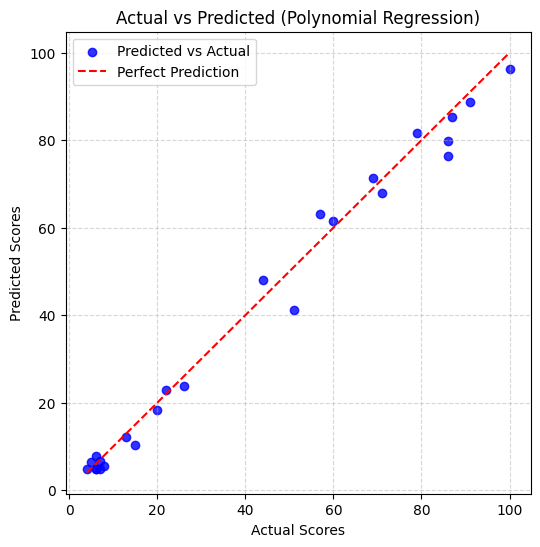

In [18]:
import matplotlib.pyplot as plt 
#Scatter plot actual vs predicted 
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.8, color="blue", label="Predicted vs Actual")
#Add a perfect fit line (y=x)
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', label="Perfect Prediction")
# Labels and title
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted (Polynomial Regression)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()